In [16]:
import pandas as pd
import numpy as np

In [39]:
data=pd.read_csv("diabetes.csv")

In [40]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [41]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
data.shape

(768, 9)

In [43]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
data.shape

(768, 9)

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

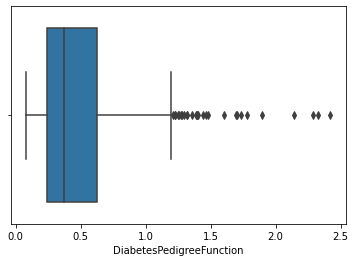

In [45]:
# Box Plot
import seaborn as sns
sns.boxplot(data['DiabetesPedigreeFunction'])

# Feature Scaling

In [46]:
y = data['DiabetesPedigreeFunction']
data.drop("DiabetesPedigreeFunction",axis=1,inplace=True)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [49]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse

0.30192555955235517

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [52]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse

0.34169379020361274

# One Hot Encoding
One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [68]:
import pandas as pd
import numpy as np

In [69]:
df=pd.read_csv("employees.csv")

In [70]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [71]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [72]:
df.shape

(1000, 8)

In [73]:
df.dropna(inplace=True)

In [74]:
df.shape

(764, 8)

In [75]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [77]:
df["Gender"].value_counts()

Female    393
Male      371
Name: Gender, dtype: int64

In [78]:
df["Senior Management"].value_counts()

False    383
True     381
Name: Senior Management, dtype: int64

In [79]:
df["Team"].value_counts()

Business Development    88
Client Services         85
Product                 83
Finance                 80
Engineering             79
Human Resources         76
Marketing               74
Sales                   72
Legal                   67
Distribution            60
Name: Team, dtype: int64

In [80]:
#We can use pd.get_dummies() function from pandas to one-hot encode the categorical columns.
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender','Senior Management','Team'])
print(one_hot_encoded_data)

    First Name Start Date Last Login Time  Salary  Bonus %  Gender_Female  \
0      Douglas   8/6/1993        12:42 PM   97308    6.945              0   
2        Maria  4/23/1993        11:17 AM  130590   11.858              1   
3        Jerry   3/4/2005         1:00 PM  138705    9.340              0   
4        Larry  1/24/1998         4:47 PM  101004    1.389              0   
5       Dennis  4/18/1987         1:35 AM  115163   10.125              0   
..         ...        ...             ...     ...      ...            ...   
994     George  6/21/2013         5:47 PM   98874    4.479              0   
996    Phillip  1/31/1984         6:30 AM   42392   19.675              0   
997    Russell  5/20/2013        12:39 PM   96914    1.421              0   
998      Larry  4/20/2013         4:45 PM   60500   11.985              0   
999     Albert  5/15/2012         6:24 PM  129949   10.169              0   

     Gender_Male  Senior Management_False  Senior Management_True  \
0     

# Feature Engineering
Feature engineering is a process of using domain knowledge to create/extract new features from a given dataset by using data mining techniques. It helps machine learning algorithms to understand data and determine patterns that can improve the performance of machine learning algorithms.